# **Machine Learning model for gas production prediction**
# **Part 3: Machine Learning Regression Model Training and Evaluation**
### **Author:** M. Sc. Alberto M. Palacio Bastos - Data Scientist
### **Objective:** Build a model to estimate gas production.
### **Dataset:** http://huy302.github.io/interview_dataset.csv

## 3.1. Import libraries and packages

In [1]:
# for data manipulation
import numpy as np
import pandas as pd

# for data visualizaton
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

# for data preprocessing
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.feature_selection import RFE

# for model construction
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline

# for model evaluation
import sklearn.metrics as metrics

# for displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# for displaying plots in notebook cell
%matplotlib inline

# Loading confirmation
print("Libraries Loaded:\n",
      " Numpy:", np.__version__, "\n",
      " Pandas:", pd.__version__, "\n",
      " Matplotlib:", matplotlib.__version__, "\n",
      " Seaborn:", sns.__version__, "\n",
      " Scikit-learn:", sklearn.__version__)

Libraries Loaded:
  Numpy: 1.26.2 
  Pandas: 2.2.1 
  Matplotlib: 3.8.3 
  Seaborn: 0.13.0 
  Scikit-learn: 1.3.2


## 3.2. Load features dataset

In [2]:
# Load dataset
df = pd.read_csv("features_dataset.csv")
df.head()

,treatment_company,operator,age,azimuth,md,tvd,porpoise_deviation,porpoise_count,shale_footage,acoustic_impedance,log_permeability,toc,vcl,p-velocity,pump_rate,proppant_fluid_ratio,unit_proppant_volume,br,production
0,1,1,6,-32.279999,19148,6443.0,6.33,12,1093,30123.20,0.68,5.00,0.42,13592.23,83,1.23,1126.425319,225.000000,5614.947951
1,3,1,6,-26.879999,14950,5907.0,2.03,6,3254,28900.25,0.29,4.69,0.61,13227.81,88,1.67,1144.898997,228.214286,1450.033022
2,4,1,12,-49.099998,11098,6538.0,6.00,23,7470,32826.08,0.73,4.40,0.56,12646.34,100,0.77,337.858984,220.000000,1060.764407
3,5,3,12,5.560000,10549,7024.0,11.87,9,3637,26740.05,0.47,4.66,0.58,13192.18,94,1.32,634.250166,229.571429,607.530385
4,6,4,10,-36.990002,13254,7956.0,2.49,7,3099,30416.95,0.07,4.74,0.85,12928.82,97,0.85,476.988834,225.857143,1251.606147


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   treatment_company     558 non-null    int64  
 1   operator              558 non-null    int64  
 2   age                   558 non-null    int64  
 3   azimuth               558 non-null    float64
 4   md                    558 non-null    int64  
 5   tvd                   558 non-null    float64
 6   porpoise_deviation    558 non-null    float64
 7   porpoise_count        558 non-null    int64  
 8   shale_footage         558 non-null    int64  
 9   acoustic_impedance    558 non-null    float64
 10  log_permeability      558 non-null    float64
 11  toc                   558 non-null    float64
 12  vcl                   558 non-null    float64
 13  p-velocity            558 non-null    float64
 14  pump_rate             558 non-null    int64  
 15  proppant_fluid_ratio  5

In [4]:
df.describe(include='all')

,treatment_company,operator,age,azimuth,md,tvd,porpoise_deviation,porpoise_count,shale_footage,acoustic_impedance,log_permeability,toc,vcl,p-velocity,pump_rate,proppant_fluid_ratio,unit_proppant_volume,br,production
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,7.188172,10.550179,8.980287,-33.720175,14019.544803,7134.817204,48.497401,10.216846,5598.012545,33497.191631,0.641559,4.617725,0.635143,12760.380950,84.908602,1.166344,711.843444,228.592550,1975.340606
std,5.141314,7.704844,2.254373,17.640298,2579.793702,894.173353,114.091305,7.493476,3199.126349,2083.625387,0.395899,0.571091,0.314107,694.199383,12.680180,0.399427,336.311838,7.598468,1410.460908
min,1.000000,1.000000,5.000000,-83.260002,8765.000000,4935.000000,0.030000,1.000000,65.000000,26740.050000,-0.020000,1.630000,0.070000,10874.410000,2.000000,0.040000,45.182288,210.071429,76.107246
25%,3.000000,5.000000,7.000000,-45.434999,12191.500000,6429.500000,4.537500,5.000000,3528.750000,32883.510000,0.310000,4.500000,0.470000,12231.567500,77.000000,0.960000,470.215128,224.428571,1026.213567
50%,7.000000,8.000000,9.000000,-33.905735,13728.500000,7017.500000,11.175000,8.000000,5085.000000,34557.480000,0.535000,4.680000,0.580000,13108.170000,86.000000,1.120000,660.611896,227.714286,1578.913503
75%,10.000000,14.000000,11.000000,-23.147500,15474.000000,7875.750000,28.872500,15.000000,7198.500000,34807.207500,0.907500,4.810000,0.630000,13263.267500,95.000000,1.320000,912.345522,230.482143,2614.691492
max,31.000000,35.000000,13.000000,21.959999,27797.000000,9067.000000,979.460000,39.000000,17763.000000,38057.630000,1.930000,6.860000,2.000000,13834.170000,110.000000,5.410000,2812.418985,246.928571,8880.671151


## 3.3. Isolate features and target

In [5]:
features_df = df.drop(columns='production')
target_df = df['production']
print("Features shape:", features_df.shape, "\n", "Target shape:", target_df.shape)

Features shape: (558, 18) 
 Target shape: (558,)


## 3.4. Encode categorical variables `treatment_company` and `operator`

In [6]:
encoder = preprocessing.OneHotEncoder(min_frequency=30, sparse_output=False)
one_hot_encoded = encoder.fit_transform(features_df[['treatment_company', 'operator']])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['treatment_company', 'operator']))
encoded_features_df = pd.concat([features_df,one_hot_df], axis=1)
encoded_features_df = encoded_features_df.drop(columns=['treatment_company', 'operator'])

encoded_features_df.head()


,age,azimuth,md,tvd,porpoise_deviation,porpoise_count,shale_footage,acoustic_impedance,log_permeability,toc,vcl,p-velocity,pump_rate,proppant_fluid_ratio,unit_proppant_volume,br,treatment_company_1,treatment_company_2,treatment_company_3,treatment_company_4,treatment_company_5,treatment_company_8,treatment_company_9,treatment_company_10,treatment_company_12,treatment_company_infrequent_sklearn,operator_1,operator_4,operator_5,operator_6,operator_7,operator_8,operator_11,operator_14,operator_infrequent_sklearn
0,6,-32.279999,19148,6443.0,6.33,12,1093,30123.20,0.68,5.00,0.42,13592.23,83,1.23,1126.425319,225.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,-26.879999,14950,5907.0,2.03,6,3254,28900.25,0.29,4.69,0.61,13227.81,88,1.67,1144.898997,228.214286,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12,-49.099998,11098,6538.0,6.00,23,7470,32826.08,0.73,4.40,0.56,12646.34,100,0.77,337.858984,220.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12,5.560000,10549,7024.0,11.87,9,3637,26740.05,0.47,4.66,0.58,13192.18,94,1.32,634.250166,229.571429,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,10,-36.990002,13254,7956.0,2.49,7,3099,30416.95,0.07,4.74,0.85,12928.82,97,0.85,476.988834,225.857143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3.5. Scale features and target

In [7]:
scaler = preprocessing.MaxAbsScaler()
scaled_features = scaler.fit_transform(encoded_features_df)
scaled_features_df = pd.DataFrame(scaled_features, columns=encoded_features_df.columns)
scaled_features_df.head()

,age,azimuth,md,tvd,porpoise_deviation,porpoise_count,shale_footage,acoustic_impedance,log_permeability,toc,vcl,p-velocity,pump_rate,proppant_fluid_ratio,unit_proppant_volume,br,treatment_company_1,treatment_company_2,treatment_company_3,treatment_company_4,treatment_company_5,treatment_company_8,treatment_company_9,treatment_company_10,treatment_company_12,treatment_company_infrequent_sklearn,operator_1,operator_4,operator_5,operator_6,operator_7,operator_8,operator_11,operator_14,operator_infrequent_sklearn
0,0.461538,-0.387701,0.688851,0.710599,0.006463,0.307692,0.061532,0.791515,0.352332,0.728863,0.210,0.982511,0.754545,0.227357,0.400518,0.911195,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.461538,-0.322844,0.537828,0.651483,0.002073,0.153846,0.183190,0.759381,0.150259,0.683673,0.305,0.956169,0.800000,0.308688,0.407087,0.924212,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.923077,-0.589719,0.399252,0.721076,0.006126,0.589744,0.420537,0.862536,0.378238,0.641399,0.280,0.914138,0.909091,0.142329,0.120131,0.890946,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.923077,0.066779,0.379501,0.774677,0.012119,0.230769,0.204751,0.702620,0.243523,0.679300,0.290,0.953594,0.854545,0.243993,0.225518,0.929708,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.769231,-0.444271,0.476814,0.877468,0.002542,0.179487,0.174464,0.799234,0.036269,0.690962,0.425,0.934557,0.881818,0.157116,0.169601,0.914666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
scaled_target = scaler.fit_transform(np.array(target_df).reshape(-1, 1))
scaled_target_df = pd.DataFrame(scaled_target, columns=['production'])
scaled_target_df.head()

,production
0,0.632266
1,0.163280
2,0.119446
3,0.068410
4,0.140936


## 3.6. Rank most important features

In [9]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(scaled_features_df, scaled_target_df)
features_ranking = list(zip(scaled_features_df.columns, selector.ranking_))
features_ranking_df = pd.DataFrame(features_ranking, columns=['feature', 'ranking'])
features_ranking_df.sort_values(by='ranking')

,feature,ranking
15,br,1
11,p-velocity,2
2,md,3
14,unit_proppant_volume,4
3,tvd,5
33,operator_14,6
29,operator_6,7
7,acoustic_impedance,8
0,age,9
12,pump_rate,10


## 3.8. Train Regression Models

### 3.8.1. Classic Multiple Linear Regressor
Trained in all the features in training data without scaling numerical features

In [10]:
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.30, random_state=22)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 390 rows
Test Set: 168 rows


In [11]:
model_MLR = LinearRegression().fit(X_train, y_train)
MLR_pred = model_MLR.predict(X_test)

MLR_MSE = metrics.mean_squared_error(y_test, MLR_pred)
MLR_RMSE = np.sqrt(MLR_MSE)
MLR_r2 = metrics.r2_score(y_test, MLR_pred)

MLR_report_df = pd.DataFrame(data=[['Classic Multiple Linear Regression', MLR_MSE, MLR_RMSE, MLR_r2]], columns=['Model', 'MSE', 'RMSE', 'r2'])
report_df = MLR_report_df
report_df

,Model,MSE,RMSE,r2
0,Classic Multiple Linear Regression,959312.07943,979.444781,0.536962


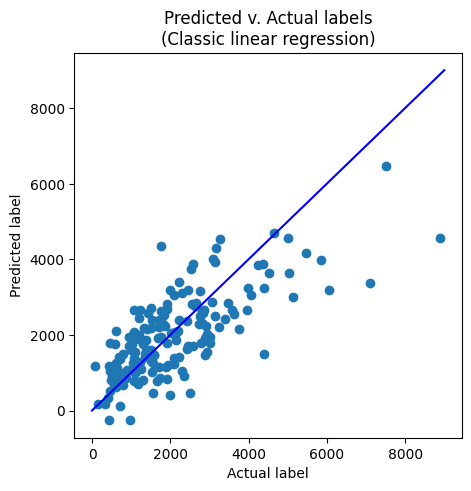

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=MLR_pred)
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.title("Predicted v. Actual labels\n(Classic linear regression)")
# overlay the perfect regression line
plt.plot((0,9000), (0,9000), color='blue')
plt.show()

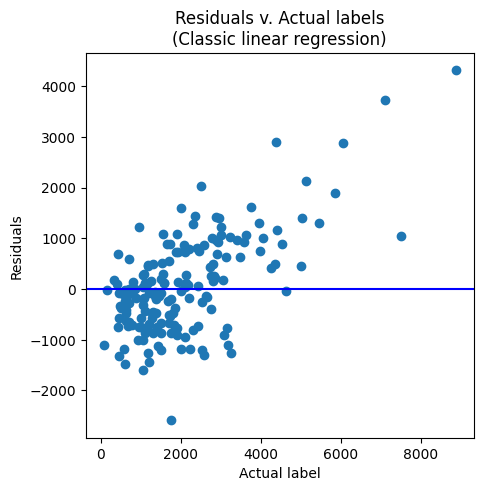

In [13]:
# Plot residuals
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=(y_test-MLR_pred))
plt.xlabel("Actual label")
plt.ylabel("Residuals")
plt.title("Residuals v. Actual labels\n(Classic linear regression)")
# overlay the residuals=0 line
plt.axhline(y=0, color='b')
plt.show()

### 3.8.2. Scaled Multiple Linear Regressor
Trained in all the features in scaled training data without cross validation

In [14]:
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target_df, test_size=0.30, random_state=22)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 390 rows
Test Set: 168 rows


In [15]:
model_sc_MLR = LinearRegression().fit(X_train, y_train)
sc_MLR_pred = model_sc_MLR.predict(X_test)

sc_MLR_MSE = metrics.mean_squared_error(y_test, sc_MLR_pred)
sc_MLR_RMSE = np.sqrt(sc_MLR_MSE)
sc_MLR_r2 = metrics.r2_score(y_test, sc_MLR_pred)

sc_MLR_report_df = pd.DataFrame(data=[['Scaled Multiple Linear Regression', sc_MLR_MSE, sc_MLR_RMSE, sc_MLR_r2]], columns=['Model', 'MSE', 'RMSE', 'r2'])
report_df = pd.concat([MLR_report_df, sc_MLR_report_df]).reset_index().drop(columns='index')
report_df


,Model,MSE,RMSE,r2
0,Classic Multiple Linear Regression,959312.079430,979.444781,0.536962
1,Scaled Multiple Linear Regression,765436.635932,874.892357,0.630541


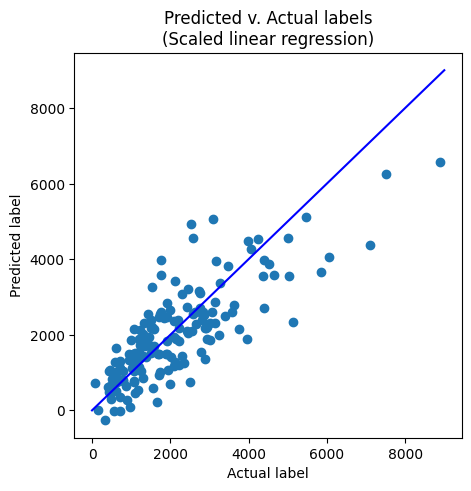

In [16]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=sc_MLR_pred)
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.title("Predicted v. Actual labels\n(Scaled linear regression)")
# overlay the perfect regression line
plt.plot((0,9000), (0,9000), color='blue')
plt.show()

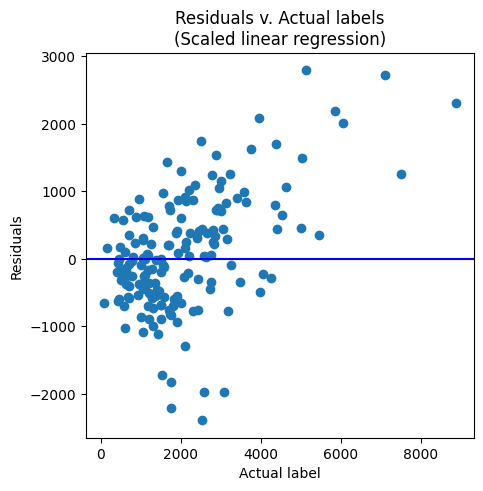

In [17]:
# Plot residuals
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=(y_test-sc_MLR_pred))
plt.xlabel("Actual label")
plt.ylabel("Residuals")
plt.title("Residuals v. Actual labels\n(Scaled linear regression)")
# overlay the residuals=0 line
plt.axhline(y=0, color='b')
plt.show()

### 3.8.3. Lasso Linear Regressor
Trained in all the features in scaled training data without cross validation

In [18]:
model_Lasso = Lasso().fit(X_train, y_train)
Lasso_pred = model_Lasso.predict(X_test)

Lasso_MSE = metrics.mean_squared_error(y_test, Lasso_pred)
Lasso_RMSE = np.sqrt(Lasso_MSE)
Lasso_r2 = metrics.r2_score(y_test, Lasso_pred)

Lasso_report_df = pd.DataFrame(data=[['Lasso Regression', Lasso_MSE, Lasso_RMSE, Lasso_r2]], columns=['Model', 'MSE', 'RMSE', 'r2'])
report_df = pd.concat([report_df, Lasso_report_df]).reset_index().drop(columns='index')
report_df


,Model,MSE,RMSE,r2
0,Classic Multiple Linear Regression,959312.079430,979.444781,0.536962
1,Scaled Multiple Linear Regression,765436.635932,874.892357,0.630541
2,Lasso Regression,760916.509644,872.305285,0.632723


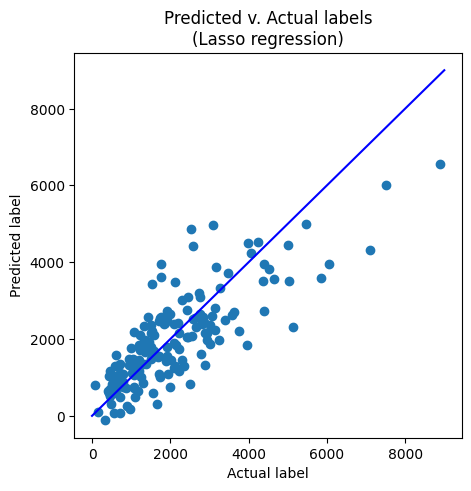

In [19]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=Lasso_pred)
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.title("Predicted v. Actual labels\n(Lasso regression)")
# overlay the perfect regression line
plt.plot((0,9000), (0,9000), color='blue')
plt.show()

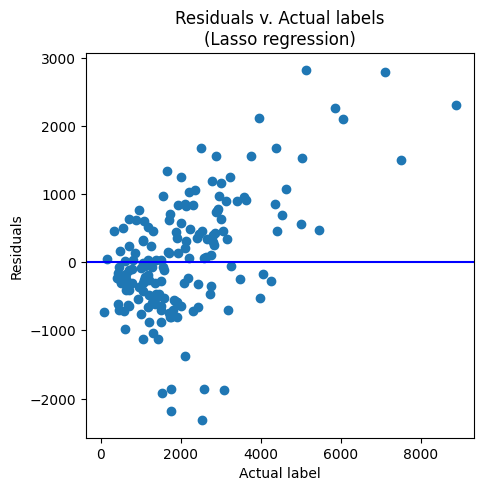

In [20]:
# Plot residuals
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=(y_test-Lasso_pred))
plt.xlabel("Actual label")
plt.ylabel("Residuals")
plt.title("Residuals v. Actual labels\n(Lasso regression)")
# overlay the residuals=0 line
plt.axhline(y=0, color='b')
plt.show()